To install simbio from a Jupyter notebook / Google Colab,
run the following command on a cell:
```
!uv pip install simbio
```

# Stochastic simulations in SimBio
Simbio contains the capability to stochastically simulate systems using the [Gillespie algorithm](http://en.wikipedia.org/wiki/Gillespie_algorithm); this is preferable over ODE based simulations for reactions where small amounts of reactantas are present. Given a Compartment:

In [6]:
import xarray
from simbio import Compartment, Species, initial, reactions
from simbio.simulators.rebop import RebopSimulator


class Infection(Compartment):
    S: Species = initial(default=100)
    I: Species = initial(default=1)
    R: Species = initial(default=0)

    r_infect = reactions.Synthesis(A=S, B=I, AB=2 * I, rate=0.015)
    r_cure = reactions.Conversion(A=I, B=R, rate=0.1)

We can create a `RebopSimulator` for it:

In [18]:
rebsim = RebopSimulator(Infection)
result = rebsim.solve(n_points=1000, upto_t=10)
df = result.to_dataframe()

Unlike the regular `Simulator.solve()` wich takes an iterable of times to `save_at`, `RebopSimulator.solve()` takes argumentes `upto_t` to control simulation end time and `n_points` wich decides how many equally spaced times are sampled. Since it doesn't conut 0, `n_points` = N will an return N + 1 row array:

In [16]:
df.index

Index([ 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
       ...
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0],
      dtype='float64', name='time', length=1001)

It also differs from `Simulator` in that it outputs an [xarray](https://docs.xarray.dev/en/stable/) `Dataset` instead of a pandas dataframe. As above, the `Dataset.to_dataframe()` method converts it to a dataframe, allowing among other things the use of the `.plot()` method.

To manually set a seed, we must pass it to the `rng` argunent:

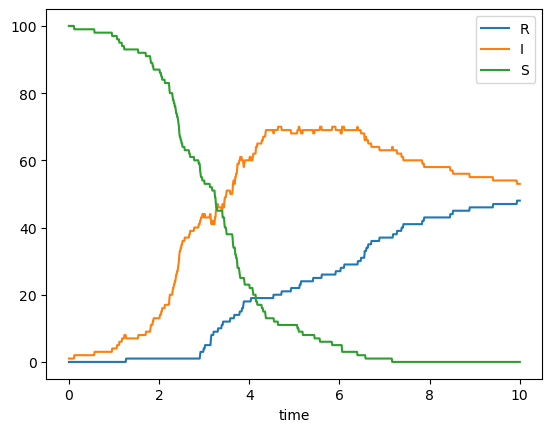

In [ ]:
result = rebsim.solve(n_points=1000, upto_t=10, rng=23534256).to_dataframe().plot()

Of cousres, since the simulation is stochatic the result will be different every time its run. We can run it many times to get a better idea of the system's behaviour:

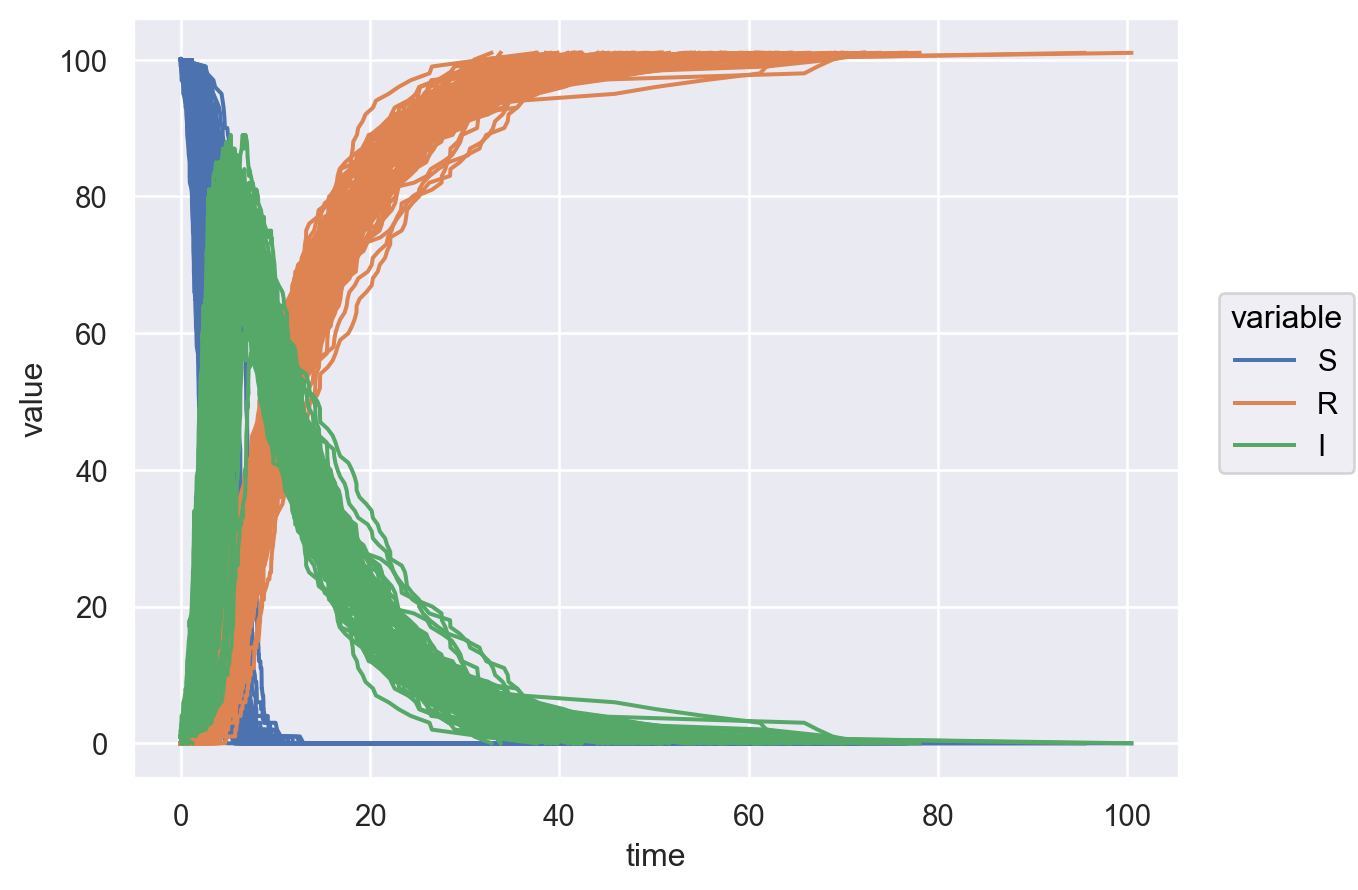

In [43]:
import seaborn.objects as so

df_100 = (
    xarray.concat(
        [rebsim.solve(n_points=0, upto_t=100) for _ in range(100)],
        dim="seed",
        join="outer",
    )
    .to_dataframe()
    .melt(ignore_index=False)
    .reset_index()
)
df_100
so.Plot(df_100, x="time", y="value", color="variable", group="seed").add(so.Lines())